In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sonar.all-data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape

(208, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [7]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

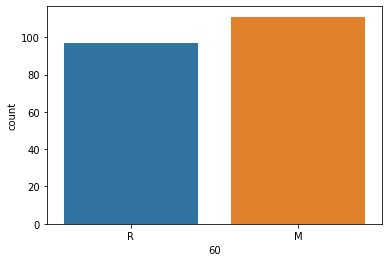

In [9]:
sns.countplot(x=60, data=df)

In [10]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

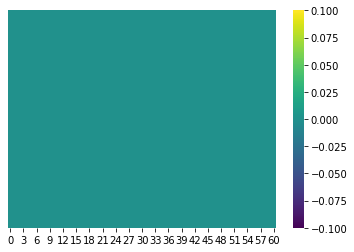

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [12]:
df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[60] = le.fit_transform(df[60])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [14]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [15]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(168, 61)

In [16]:
df_new.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
        ...   
56    1.378156
57    1.364882
58    1.464334
59    1.144572
60    0.000000
Length: 61, dtype: float64

In [17]:
X = df_new.drop(60, axis = 1)
y = df_new[60]

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
max_accuracy_score=0
for r_state in range(42,250):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 144 is 0.9285714285714286


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=144)

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predlr)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predlr)))
print("Classification Report\n{}".format(classification_report(y_test,predlr)))

Accuracy Score 0.9285714285714286
Confusion Matrix 
[[23  1]
 [ 2 16]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.94      0.89      0.91        18

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.93        42
weighted avg       0.93      0.93      0.93        42



In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
neighbors = {"n_neighbors":range(1,10)}
knc = KNeighborsClassifier()
gknr = GridSearchCV(knc,neighbors,cv=10)
gknr.fit(X,y)
gknr.best_params_

{'n_neighbors': 1}

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predknn)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predknn)))
print("Classification Report\n{}".format(classification_report(y_test,predknn)))

Accuracy Score 0.8571428571428571
Confusion Matrix 
[[21  3]
 [ 3 15]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.83      0.83      0.83        18

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



In [23]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LogisticRegression(),X,y,cv=5,scoring="accuracy")
a_score

array([0.52941176, 0.82352941, 0.5       , 0.93939394, 0.48484848])

In [24]:
mnb = GaussianNB()
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predmnb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predmnb)))
print("Classification Report\n{}".format(classification_report(y_test,predmnb)))

Accuracy Score 0.8571428571428571
Confusion Matrix 
[[20  4]
 [ 2 16]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.80      0.89      0.84        18

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



In [25]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predmnb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predmnb)))
print("Classification Report\n{}".format(classification_report(y_test,predmnb)))

Accuracy Score 0.7619047619047619
Confusion Matrix 
[[17  7]
 [ 3 15]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.68      0.83      0.75        18

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.78      0.76      0.76        42



In [27]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report{}".format(classification_report(y_test,predsvc)))

Accuracy Score 0.8809523809523809
Confusion Matrix 
[[20  4]
 [ 1 17]]
Classification Report              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.81      0.94      0.87        18

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



In [28]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report{}".format(classification_report(y_test,predsvc)))

Accuracy Score 0.8809523809523809
Confusion Matrix 
[[23  1]
 [ 4 14]]
Classification Report              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.93      0.78      0.85        18

    accuracy                           0.88        42
   macro avg       0.89      0.87      0.88        42
weighted avg       0.89      0.88      0.88        42



In [30]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report{}".format(classification_report(y_test,predsvc)))

Accuracy Score 0.9523809523809523
Confusion Matrix 
[[24  0]
 [ 2 16]]
Classification Report              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.89      0.94        18

    accuracy                           0.95        42
   macro avg       0.96      0.94      0.95        42
weighted avg       0.96      0.95      0.95        42



In [33]:
dtc = DecisionTreeClassifier()
#default:criterion='gini'
dtc.fit(X_train,y_train)
preddtc = dtc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,preddtc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,preddtc)))
print("Classification Report{}".format(classification_report(y_test,preddtc)))

Accuracy Score 0.7142857142857143
Confusion Matrix 
[[17  7]
 [ 5 13]]
Classification Report              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.65      0.72      0.68        18

    accuracy                           0.71        42
   macro avg       0.71      0.72      0.71        42
weighted avg       0.72      0.71      0.72        42



In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 250, random_state = 144)
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predrf)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predrf)))
print("Classification Report{}".format(classification_report(y_test,predrf)))

Accuracy Score 0.9523809523809523
Confusion Matrix 
[[23  1]
 [ 1 17]]
Classification Report              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.94      0.94      0.94        18

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [35]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
#AdaBoostClassifier(base_estimators=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad.fit(X_train,y_train)
predad = ad.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predad)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predad)))
print("Classification Report{}".format(classification_report(y_test,predad)))

Accuracy Score 0.8571428571428571
Confusion Matrix 
[[20  4]
 [ 2 16]]
Classification Report              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.80      0.89      0.84        18

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



In [36]:
ad1 = AdaBoostClassifier(n_estimators=250)
ad1.fit(X_train,y_train)
predad1 = ad1.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predad1)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predad1)))
print("Classification Report{}".format(classification_report(y_test,predad1)))

Accuracy Score 0.9047619047619048
Confusion Matrix 
[[22  2]
 [ 2 16]]
Classification Report              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.89      0.89      0.89        18

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [37]:
from sklearn.svm import SVC
svc=SVC()
ad = AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,y_train)
predad = ad.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predad)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predad)))
print("Classification Report{}".format(classification_report(y_test,predad)))

Accuracy Score 0.42857142857142855
Confusion Matrix 
[[ 0 24]
 [ 0 18]]
Classification Report              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.43      1.00      0.60        18

    accuracy                           0.43        42
   macro avg       0.21      0.50      0.30        42
weighted avg       0.18      0.43      0.26        42



In [38]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='poly')
ad = AdaBoostClassifier(n_estimators=45,base_estimator=svc)
ad.fit(X_train,y_train)
predad = ad.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predad)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predad)))
print("Classification Report{}".format(classification_report(y_test,predad)))

Accuracy Score 0.9523809523809523
Confusion Matrix 
[[23  1]
 [ 1 17]]
Classification Report              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.94      0.94      0.94        18

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {"learning_rate":[0.001,0.01,0.1,1,10],"n_estimators":[10,100,250,400]}
clf=GridSearchCV(gbc, parameters, cv=5)
clf.fit(X,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 1,n_estimators = 100,random_state=144)
gb.fit(X_train,y_train)
predgb = gb.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predgb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predgb)))
print("Classification Report{}".format(classification_report(y_test,predgb)))

Accuracy Score 0.8571428571428571
Confusion Matrix 
[[20  4]
 [ 2 16]]
Classification Report              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.80      0.89      0.84        18

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



In [41]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=235)
xg.fit(X_train, y_train)
predxg = xg.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predxg)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predxg)))
print("Classification Report{}".format(classification_report(y_test,predxg)))

Accuracy Score 0.8333333333333334
Confusion Matrix 
[[20  4]
 [ 3 15]]
Classification Report              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.79      0.83      0.81        18

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



In [42]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)

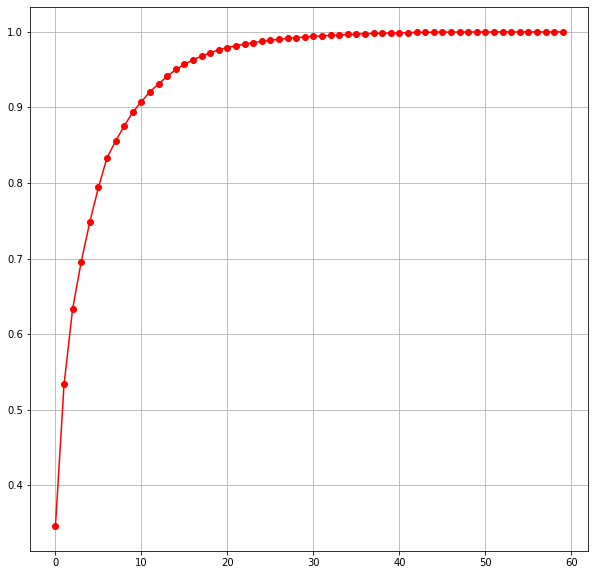

In [43]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [44]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X)
print(x_new)

[[ 0.53875493  0.55086154 -0.31581947 ...  0.09845361  0.44297842
  -0.39037274]
 [-1.0946115   0.92225087  0.77914686 ...  0.36738531 -0.14232998
  -0.33252725]
 [-0.06061299  0.29442318  0.59096689 ...  0.28864927  0.16130533
   0.08732235]
 ...
 [ 0.56369938 -0.90865883  0.21152548 ...  0.11308594 -0.25007869
  -0.02277359]
 [ 0.17998902 -0.87639692  0.20283177 ... -0.01695201 -0.06608524
  -0.01033911]
 [ 0.15602373 -0.77595947  0.01294476 ...  0.01875515 -0.06482331
   0.10670562]]


In [46]:
from sklearn.externals import joblib
joblib.dump(rf,'sonar_clf.pkl')

['sonar_clf.pkl']